# Cálculo Numérico - Prática 6 e 7

8.36-
A total charge Q is uniformly distributed around a ring- shaped conductor with radius a. A charge q is located at a distance x from the center of the ring (Fig. P8.36). The force exerted on the charge by the ring is given by:

    F=(1/4π*e0)*((Q*qx)/(x²+a²)**(3/2))

**CHAPRA e CANALE. Numerical Methods for Engineering.**

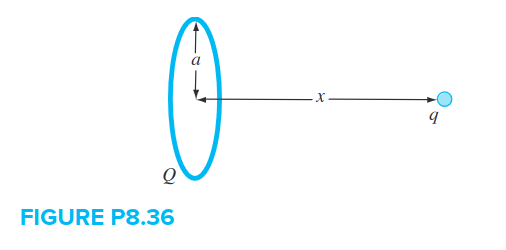

In [27]:
from PIL import Image

imagem=Image.open('/home/jvfg/Documents/Vs/Python/Numérico/Aula pratica/Aula prática 6-7/FigureP8_36.png')
display(imagem)

Where e0 = 8.854 × 10e−12 C2∕(N m2). Find the distance x where
the force is 1.2 N if q and Q are 2.25 × 10−5 C for a ring with a
radius of 0.9 m.

Deste modo a implementação da função em python se dá por:

In [14]:
import numpy as np

#Define a função, primeira derivada e segunda derivada para a implementação dos métodos

'''
e0=8.854*10e-12
F=1.2
Q=2.25 * 10e-5
qx=2.25 * 10e-5
a=0.9
'''

#Função de x:
def f(x):return (((2.25*(10**-5))**2)/(((35.416*np.pi)*(10**-12))*((x**2)+(0.9)**2)**(3/2))-1.2)

#Primeira derivada da função:
def df(x):return ((2.25*(10**-5))**2)/((35.416*np.pi)*(10**-12))*(-1/(2*(((x**2)+(0.9)**2)**3)**(3/2))*(3*((x**2+(0.9)**2)**2)*2*x))

#Segunda derivada da função:
def df_2(x):return ((2.25*(10**-5))**2)/((35.416*np.pi)*(10**-12))*(-3*(-3/(2*(((x**2)+(0.9)**2)**3)**(5/2))*(3*((x**2)+(0.9)**2)**2)*(2*x))*((x**2)+(0.9)**2)*x+(2*((x**2)+(0.9)**2))*(2*x)+((x**2)+(0.9)**2)*(1/((((x**2)+(0.9)**2)**3)**(3/2))))

Os métodos que encotram as raízes foram primeiramente desenvolvidos em arquivos separados e depois implementados para uso neste trabalho, portanto a seguir os mesmo são testados e seu tempo de execução é comparado com o uso da função '%%timeit'

# Método da Bissecção:

In [25]:
%%timeit 

def bissecçao(f,a,b,tolerancia=10e-15):
    
    '''
    Método para encontrar raizes da equação:

    f = função recebida;
    a = menor número do intervalo;
    b = maior número do intervalo;
    tolerancia = número mais próximo do buscado.

    Retorna a raiz.
    '''
    
    #testa se o valor da do produto da função calculada em a e b é maior que 0
    #portanto se o intervalo definido da bissecao esta dentro da imagem da função:
    if (f(a)*f(b))>0: return None

    #testa se parte do intervalo é a raiz
    if(f(a)==0): return a
    if(f(b)==0): return b

    #Calcula a media do intervalo:
    i=(a+b)/2

    #Define condição de retorno do resultado:
    if f(i)==0 or abs(f(i))<tolerancia:return i

    #Calcula a bissecao para o intervalo menor que a média:
    elif (f(a)*f(i))<0: return bissecçao(f,a,i)

    #Calcula a bissecao para o intervalo maior que a média:
    elif (f(b)*f(i))<0: return bissecçao(f,b,i)

177 ns ± 18.7 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


# Método de Newton:

In [24]:
%%timeit

def newton(f,df,x,tol=10e-15):
    
    '''
    Método para encontrar raizes da equação:

    f = Função das quais se buscam raizes;
    df = Derivada da função;
    x = Aproximação inicial da raiz
    tol = Número buscado, mais próximo da raiz verdadeira 

    Retorna a raiz.
    '''

    #Testa se a derivada calculada é diferente de 0:
    if(df(x)==0):return None

    #Testa se a primeira aproximação é raiz:
    if(f(x)==0):return x

    #Operacionaliza o método em si:
    y=x-(f(x)/df(x))

    #Condição de termino da recursividade e retorno da raiz:
    if abs(f(y))<tol:return y
    
    #Continuidade do método até encontrar a raiz:
    else: return newton(f,df,y)


177 ns ± 15.7 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


# Método de Halley:

In [28]:
%%timeit

def halley(f,df,df_2,x,tol=10e-15):
    '''
        Método para encontrar raizes da equação:

        f = Função das quais se buscam raizes;
        df = Derivada da função;
        df_2 = Derivada secunária da função;
        x = Aproximação inicial da raiz
        tol = Número buscado, mais próximo da raiz verdadeira 

        Retorna a raiz.
    '''
      #Looping de calculo do método:
    while(abs(f(x))>tol):

        #Verifica divisão por 0:
        if((2*((df(x))**2))-(f(x)*df_2(x)))==0:break

        #Calcula o método em si:
        x-=((2*f(x)*df(x))/((2*((df(x))**2))-(f(x)*df_2(x))))
        
    return x

117 ns ± 1.19 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


# Aplicação dos Métodos no exercício:

Fazendo a implementação das funções para execução real, e obtenção das raízes da função proposta no exercício, obtemos as seguintes células de códigos.

In [19]:
#Bissecçao:
def bissecçao(f,a,b,tolerancia=10e-15):
    
    '''
    Método para encontrar raizes da equação:

    f = função recebida;
    a = menor número do intervalo;
    b = maior número do intervalo;
    tolerancia = número mais próximo do buscado.

    Retorna a raiz.
    '''
    
    #testa se o valor da do produto da função calculada em a e b é maior que 0
    #portanto se o intervalo definido da bissecao esta dentro da imagem da função:
    if (f(a)*f(b))>0: return None

    #testa se parte do intervalo é a raiz
    if(f(a)==0): return a
    if(f(b)==0): return b

    #Calcula a media do intervalo:
    i=(a+b)/2

    #Define condição de retorno do resultado:
    if f(i)==0 or abs(f(i))<tolerancia:return i

    #Calcula a bissecao para o intervalo menor que a média:
    elif (f(a)*f(i))<0: return bissecçao(f,a,i)

    #Calcula a bissecao para o intervalo maior que a média:
    elif (f(b)*f(i))<0: return bissecçao(f,b,i)


#Newton:
def newton(f,df,x,tol=10e-15):
    
    '''
    Método para encontrar raizes da equação:

    f = Função das quais se buscam raizes;
    df = Derivada da função;
    x = Aproximação inicial da raiz
    tol = Número buscado, mais próximo da raiz verdadeira 

    Retorna a raiz.
    '''

    #Testa se a derivada calculada é diferente de 0:
    if(df(x)==0):return None

    #Testa se a primeira aproximação é raiz:
    if(f(x)==0):return x

    #Operacionaliza o método em si:
    y=x-(f(x)/df(x))

    #Condição de termino da recursividade e retorno da raiz:
    if abs(f(y))<tol:return y
    
    #Continuidade do método até encontrar a raiz:
    else: return newton(f,df,y)


#Halley:
def halley(f,df,df_2,x,tol=10e-15):
    '''
        Método para encontrar raizes da equação:

        f = Função das quais se buscam raizes;
        df = Derivada da função;
        df_2 = Derivada secunária da função;
        x = Aproximação inicial da raiz
        tol = Número buscado, mais próximo da raiz verdadeira 

        Retorna a raiz.
    '''
      #Looping de calculo do método:
    while(abs(f(x))>tol):

        #Verifica divisão por 0:
        if((2*((df(x))**2))-(f(x)*df_2(x)))==0:break

        #Calcula o método em si:
        x-=((2*f(x)*df(x))/((2*((df(x))**2))-(f(x)*df_2(x))))
        
    return x

In [27]:
#Mostra o Resultado calculado com cada método

print("A raiz do sistema calculada com o método da Bissecção é: ", bissecçao(f,0,2))
print("\nA raiz do sistema calculada com o método da Newton é: ",newton(f,df,1))
print("\nA raiz do sistema calculada com o método da Halley é: ",halley(f,df,df_2,1))
print("\nA raiz do sistema calculada sem auxílio computacional é: 1.27341503055")

A raiz do sistema calculada com o método da Bissecção é:  1.2734150305530108

A raiz do sistema calculada com o método da Newton é:  1.2734150305530156

A raiz do sistema calculada com o método da Halley é:  1.2734150305530156

A raiz do sistema calculada sem auxílio computacional é: 1.27341503055
